In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Multiplie Linear Regression - Sklearn

In [11]:
np.random.seed(42)
X = 2 * np.random.rand(100, 3)
y = 4 + 3 * X[:, 0] + 5 * X[:, 1] + 2 * X[:, 2] + np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.0173924806103027
R-squared: 0.8856631070983083


## R squared

Its a way of measuring a how my model behaves vs a baseline model. How much is my model better than just predicting the average

$$
R^2 = 1 - \frac {SS_{ \text {res}}} {SS_ {\text {tot}}}
$$

SSres - sum of squares of residuals. Measures the squared differences between observed values and <b>predicted</b> values.

$$
SSres = \sum (y_i - \hat{y}_i)^2
$$

$$
SStot = \sum (y_i - \bar{y}_i)^2
$$

SStot - total sum of squares. Measures the squared difference between observed values and the <b>mean</b> observed value.

### R squared vs MSE

#### R squared pros and cons

Pros:
1. Easy to interpret as a percentage of variance explained.
2. Good for comparing models with the same dependent variable.

Cons:
1. It doesn’t provide information on the magnitude of the error.
2. It can be misleading if used alone, especially with non-linear models or if the model has many predictors.

#### MSE pros and cons

Pros:
1. Directly measures the error magnitude.
2. Useful for optimization, as it penalizes larger errors more heavily due to squaring.

Cons:
1. The scale of MSE depends on the scale of the dependent variable, which can make it harder to interpret in relative terms.
2. MSE is not normalized, so it doesn’t provide a direct measure of how well the model explains the variance.

# Multiple Linear Regression From Scratch

### Exercise

Lets write our own make regression function

Instructions:

The function should take the following parameters:
Number of samples, number of features (X), number of targets (y), amount of noise, intercept and an optional random state

1. Generate random numbers of some configureable size (e.g. 2 by 2, 3 by 4, etc) (this is X)
2. Generate a random matrix of coefficients by the size num_features by num_targets
3. Calculate the dot product between X and the coefficients to generate some y
4. Add the intercept to y
5. Add some random noise to y
6. If random_state exists, make sure to integrate it. Check numpy documentation/Google to find our how to insert a random state (a.k.a random seed) to numpy.
7. Plot the result of your function. Is the result actually linear?

## Back to Linear Regression for Scratch Builders

In [34]:
X, y = make_regression_self_made(n_samples=100, n_features=3, noise=100, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# add a column of ones to X to act as the intercept
train_rows, train_cols = X_train.shape
test_rows, test_cols = X_test.shape
X_train = np.c_[np.ones((train_rows, 1)), X_train]
X_test = np.c_[np.ones((test_rows, 1)), X_test]

In [17]:
lr = 0.01
num_iterations = 100

In [18]:
n_features = X_train.shape[1]
params = np.random.randn(n_features)

In [19]:
def compute_loss(X, y, params):
    
    num_lablels = len(y)
    preds = X @ params # note the intercept is already included in params
    errors = preds - y
    loss = (1 / (2 * num_lablels)) * np.sum(np.square(errors))
    return loss

In [20]:
def gradient_descent(X, y, params1, lr, num_iterations):
    
    num_lablels = len(y)
    loss_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        predictions = X @ params
        errors = predictions - y
        gradients = (1 / num_lablels) * (X.T @ errors)
        params1 -= lr * gradients
        loss_history[i] = compute_loss(X, y, params)
        
    return params1, loss_history

In [21]:
params_, loss_history_ = gradient_descent(X_train, y_train, params, lr, num_iterations)

In [24]:
losses = []
for loss in loss_history_:
    losses.append(loss)

In [32]:
x_plot = [num for num in range(len(losses))]
y_plot = losses

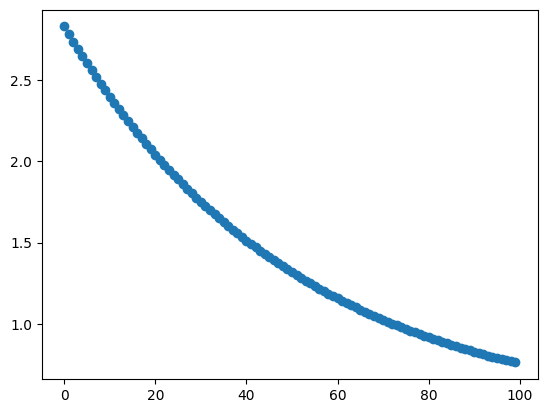

In [33]:
plt.scatter(x_plot, y_plot)

# Building a Real Model Prediction

### Exercise

take the airbnb dataset and predict the price